In [3]:
from sberpm.visual import ChartPainter

In [4]:
from sberpm import DataHolder

In [17]:
%matplotlib inline
from sberpm.visual import GraphvizPainter
from sberpm.miners import CausalMiner, SimpleMiner, HeuMiner
from sberpm.metrics import ActivityMetric, TransitionMetric, IdMetric, TraceMetric, UserMetric

In [18]:
def visualize(
    path='data/helpdesk.csv',
    id_column='Case ID',
    activity_column='Activity',
    start_timestamp_column='Complete Timestamp',
    time_format='%Y/%m/%d %H:%M:%S.%f',
    name='helpdesk',
):
    data_holder = DataHolder(path, 
                         id_column=id_column, 
                         activity_column=activity_column, 
                         start_timestamp_column=start_timestamp_column,
                         time_format=time_format)
    data_holder.check_or_calc_duration()

    activity_metric = ActivityMetric(data_holder, time_unit='day', cycle_length=None)
    transition_metric = TransitionMetric(data_holder, time_unit='day', cycle_length=2)
    miner = HeuMiner(data_holder)
    miner.apply()
    graph = miner.graph

    nodes_count_metric = activity_metric.count().to_dict()
    edges_count_metric = transition_metric.count().to_dict()
    mean_time_node_metric = activity_metric.mean_time().fillna(0).to_dict()

    graph.add_node_metric('count', nodes_count_metric)
    graph.add_edge_metric('count', edges_count_metric)
    graph.add_node_metric('mean_time', mean_time_node_metric)
    painter = GraphvizPainter()
    painter.apply(graph)
    painter.write_graph(f"{name}_graph.png", format='png')

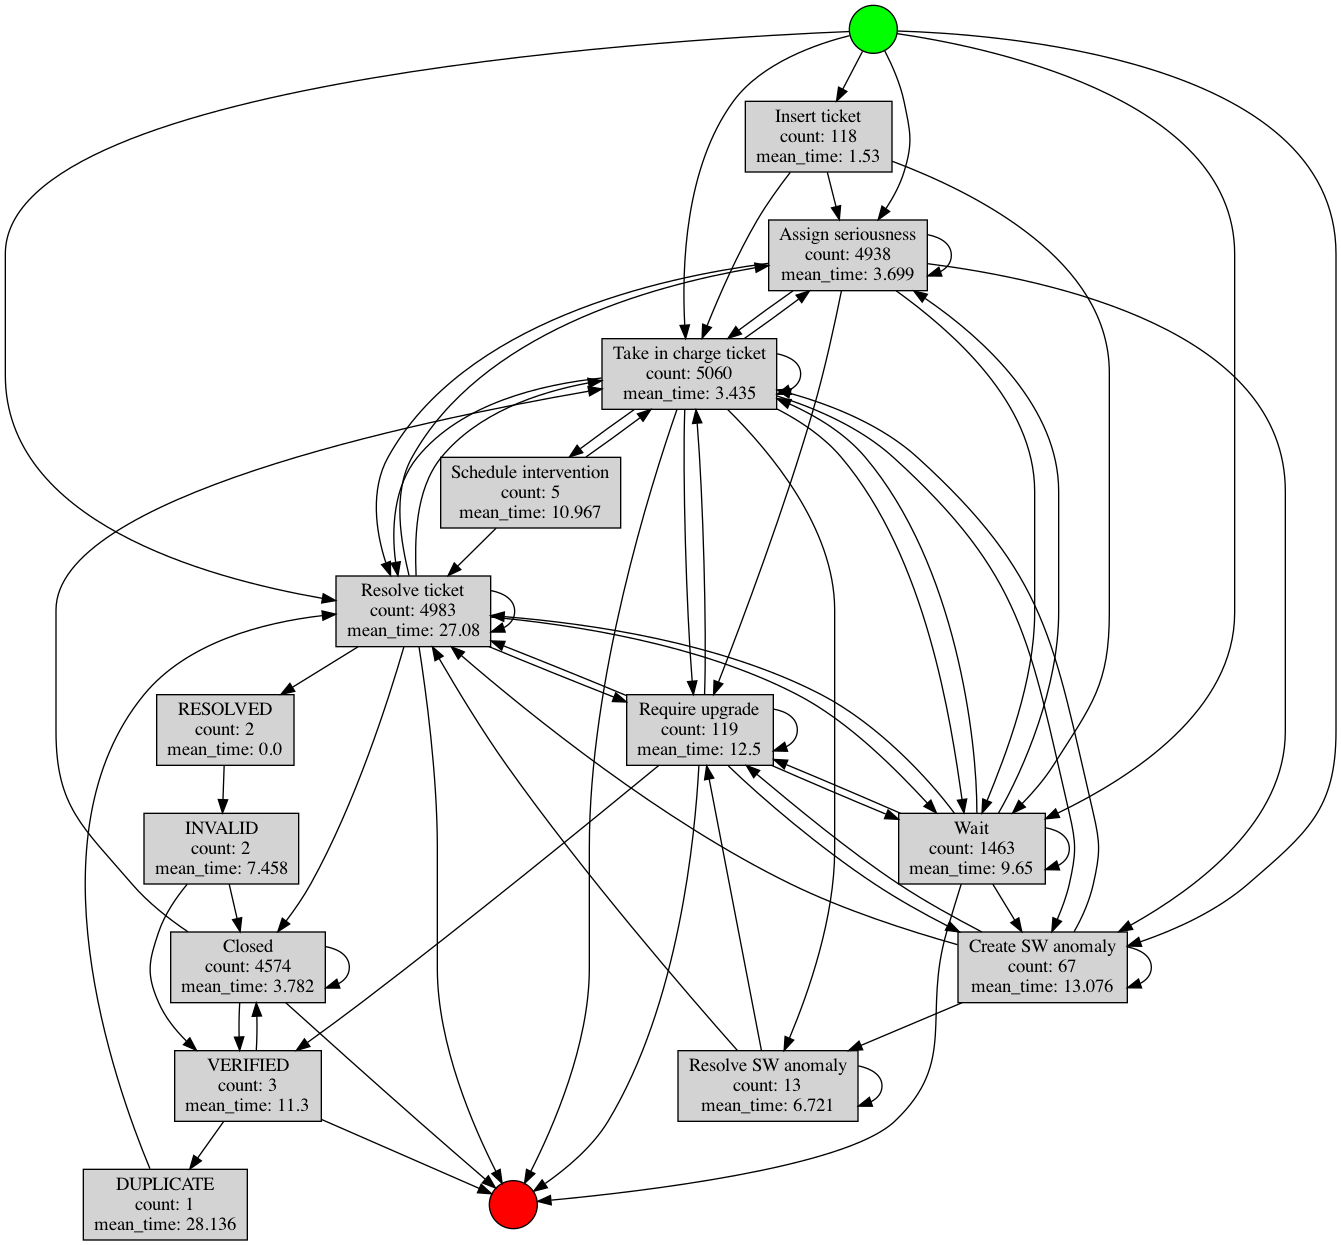

In [11]:
visualize()

from IPython.display import Image
Image("helpdesk_graph.png")

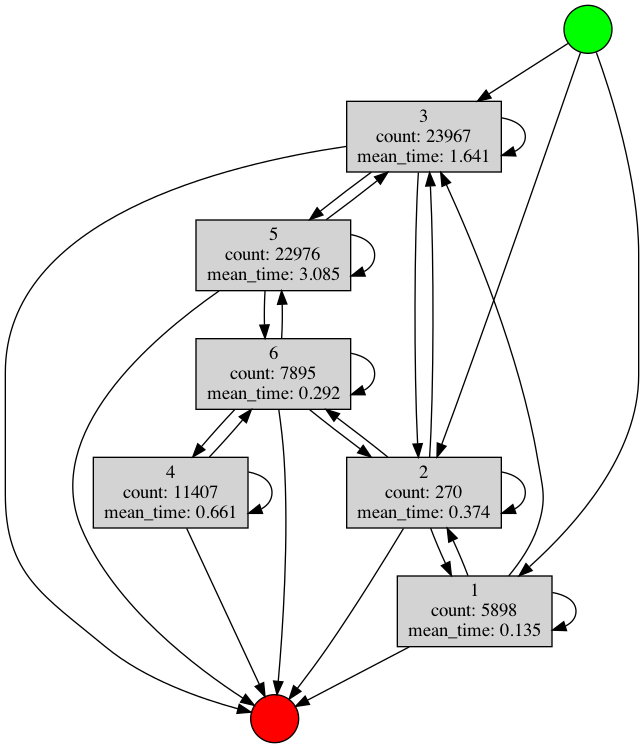

In [12]:
visualize(
    path='data/bpi12w.csv',
    id_column='CaseID',
    activity_column='ActivityID',
    start_timestamp_column='CompleteTimestamp',
    time_format='%m/%d/%Y %H:%M',
    name='bpi12w',
)

from IPython.display import Image
Image("bpi12w_graph.png")

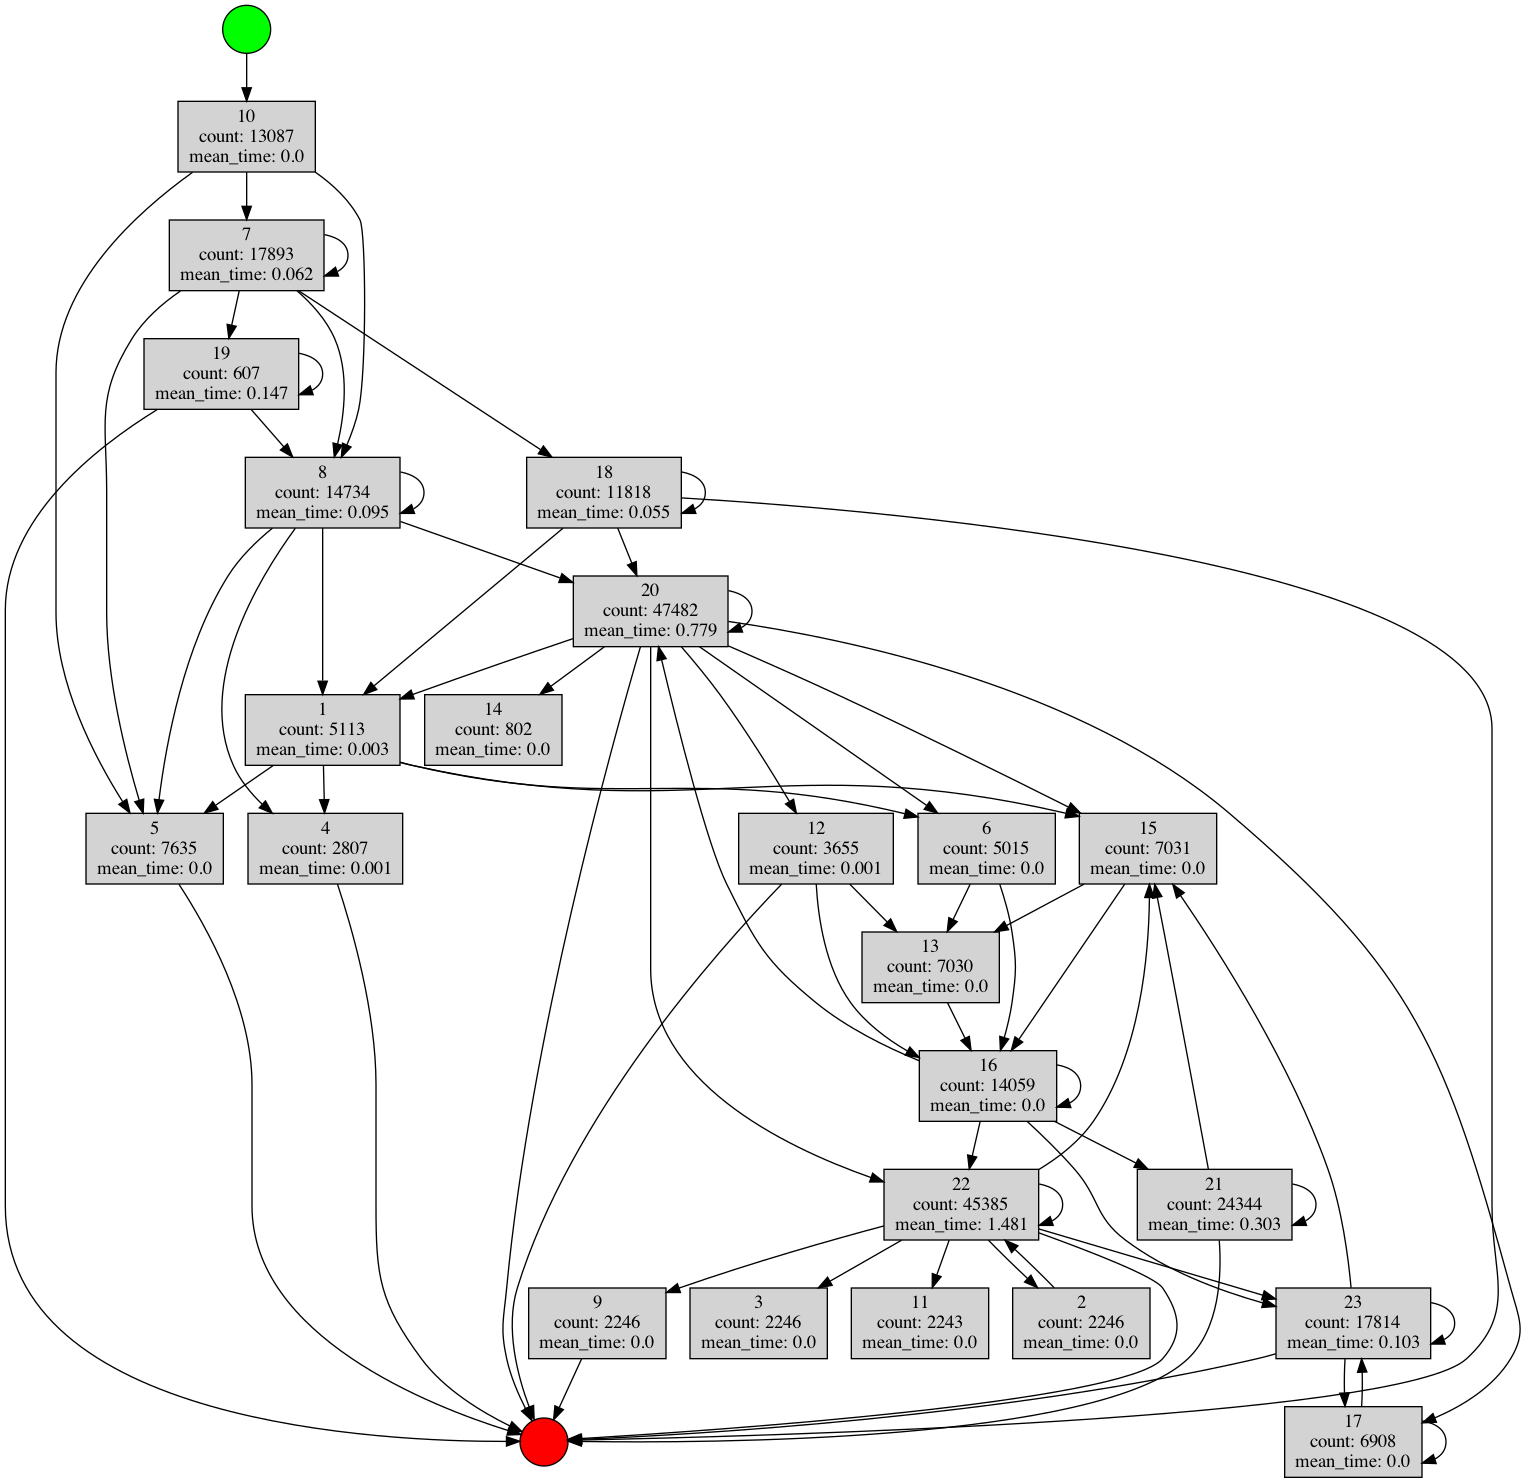

In [19]:
visualize(
    path='data/bpi12.csv',
    id_column='CaseID',
    activity_column='ActivityID',
    start_timestamp_column='CompleteTimestamp',
    time_format='%Y-%m-%d %H:%M:%S.%f',
    name='bpi12',
)

from IPython.display import Image
Image("bpi12_graph.png")

In [14]:
import pandas as pd
set(pd.read_csv('preprocessed/helpdesk_formatted_embeddings.csv').columns) - set(pd.read_csv('preprocessed/helpdesk_formatted_final.csv').columns)

{'activity_Create SW anomaly',
 'activity_DUPLICATE',
 'activity_INVALID',
 'activity_Insert ticket',
 'activity_RESOLVED',
 'activity_Require upgrade',
 'activity_Resolve SW anomaly',
 'activity_Schedule intervention',
 'activity_VERIFIED',
 'activity_ext_Create SW anomaly_Early Morning',
 'activity_ext_Create SW anomaly_Evening',
 'activity_ext_Create SW anomaly_Morning',
 'activity_ext_Create SW anomaly_Noon',
 'activity_ext_DUPLICATE_Morning',
 'activity_ext_INVALID_Evening',
 'activity_ext_INVALID_Morning',
 'activity_ext_Insert ticket_Early Morning',
 'activity_ext_Insert ticket_Evening',
 'activity_ext_Insert ticket_Morning',
 'activity_ext_Insert ticket_Noon',
 'activity_ext_RESOLVED_Evening',
 'activity_ext_RESOLVED_Morning',
 'activity_ext_Require upgrade_Early Morning',
 'activity_ext_Require upgrade_Evening',
 'activity_ext_Require upgrade_Morning',
 'activity_ext_Require upgrade_Noon',
 'activity_ext_Resolve SW anomaly_Evening',
 'activity_ext_Resolve SW anomaly_Morning',
